<a href="https://colab.research.google.com/github/ItzhakGeller/MyFirstGitHubRepo/blob/main/imdb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#preprocess the data

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
print(train_data[0][:10])
print(train_labels[:10])

17464789/17464789 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
[1 0 0 1 0 0 1 0 1 0]


In [ ]:
imdb_dict = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
revrerse_dict = dict([(value,key) for (key, value) in imdb_dict.items()])

In [ ]:
#[revrerse_dict.get(i-3) for i in train_data[0]]

Vecrotize the data

In [ ]:
def vectorize_data(sequences,num_words=10000):
  vectorized = np.zeros((len(sequences),num_words))
  for i,sequence in enumerate(sequences):
    for j in sequence:
      vectorized[i,j] = 1
  return vectorized.astype(np.float32)

In [ ]:
train_data_vectorized = vectorize_data(train_data)
test_data_vectorized = vectorize_data(test_data)

In [ ]:
print(train_data_vectorized.shape)
print(train_data.dtype)

(25000, 10000)
object


In [ ]:
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

# Buildin the model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation= "relu"),
    layers.Dense(1,activation="sigmoid")
])

In [ ]:
model.compile(
    loss = "binary_crossentropy",
    optimizer="rmsprop",
    metrics = ["accuracy"])

In [ ]:
history = model.fit(x=train_data_vectorized,y=y_train,
          validation_data=(test_data_vectorized,y_test),
          epochs=20,
          batch_size=512)

Epoch 1/20
49/49 [==============================] - 10s 87ms/step - loss: 0.4546 - accuracy: 0.8180 - val_loss: 0.3393 - val_accuracy: 0.8766
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.2696 - accuracy: 0.9036 - val_loss: 0.2851 - val_accuracy: 0.8901
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2094 - accuracy: 0.9238 - val_loss: 0.2777 - val_accuracy: 0.8887
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1808 - accuracy: 0.9348 - val_loss: 0.2963 - val_accuracy: 0.8813
Epoch 5/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1558 - accuracy: 0.9447 - val_loss: 0.3105 - val_accuracy: 0.8794
Epoch 6/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1405 - accuracy: 0.9510 - val_loss: 0.3189 - val_accuracy: 0.8782
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1266 - accuracy: 0.9565 - val_loss: 0.3601 - val_accuracy: 0.8686
Epoch 8/20
4

In [ ]:
train_data_vectorized.dtype

dtype('float32')

In [ ]:
import pandas as pd
model_data = pd.DataFrame(history.history)
model_data.head()

,loss,accuracy,val_loss,val_accuracy
0,0.454621,0.81800,0.339291,0.87656
1,0.269570,0.90364,0.285103,0.89008
2,0.209412,0.92376,0.277726,0.88872
3,0.180773,0.93476,0.296305,0.88132
4,0.155819,0.94472,0.310494,0.87940


<AxesSubplot:>

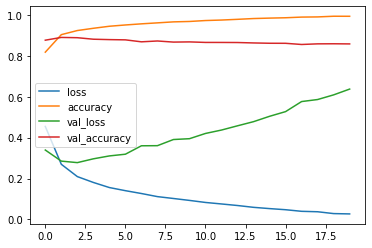

In [ ]:
model_data.plot()

In [ ]:
model.predict(train_data_vectorized[:10])

1/1 [==============================] - 0s 91ms/step


array([[9.9989259e-01],
       [1.1531225e-05],
       [1.2015397e-06],
       [9.9999976e-01],
       [2.1606607e-05],
       [1.7811760e-01],
       [9.9969506e-01],
       [2.0140022e-13],
       [9.9999309e-01],
       [1.3751760e-02]], dtype=float32)